Atividade 05 - Maria Eduarda Esteves Neves

# Image Classification using Deep Learning

In [ ]:
!nvidia-smi

Thu Mar 13 15:16:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Dataset

1. Indoor Scene Recognition
2. Classificação de imagens internas com 67 classes
3. Total de 15.620 imagens
4. Pelo menos 100 imagens por classe
5. https://web.mit.edu/torralba/www/indoor.html

### Download dataset

A extração do banco de dados será feita utilizando o wget:
 - wget --> ‘web get’, Utilizando esse comando é feita a extração do banco de dados diretamente da fonte, sem precisar baixá-la para o computador.

In [ ]:
!wget http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar

--2025-03-13 15:16:35--  http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.52.131.233
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.52.131.233|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar [following]
--2025-03-13 15:16:36--  https://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.52.131.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2592010240 (2.4G) [application/x-tar]
Saving to: ‘indoorCVPR_09.tar.1’

indoorCVPR_09.tar.1 100%[===================>]   2.41G  8.58MB/s    in 5m 0s   

2025-03-13 15:21:37 (8.24 MB/s) - ‘indoorCVPR_09.tar.1’ saved [2592010240/2592010240]





1.   x: extract an archive.
2.   v: verbose to print its action on console.
3.   f: which file to perform the action on.




In [ ]:
#tar vai descompactar as imagens, criando uma pasta dentro de onde você está trabalhando

#ela vem em estrutura onde você tem para cada classe, uma pasta.
#as imagens estão em formato rgb de tamanhos diferentes

!tar -xvf indoorCVPR_09.tar

A saída de streaming foi truncada nas últimas 5000 linhas.
Images/mall/cover_home3.jpg
Images/mall/CP67791.jpg
Images/mall/crocker_galleria_735089.jpg
Images/mall/mall1.jpg
Images/mall/d8.jpg
Images/mall/deira_city_centre_dubai_08.jpg
Images/mall/dungarv_new_mall.jpg
Images/mall/latham_circle_mall_16.jpg
Images/mall/eastridg1.jpg
Images/mall/IMG_6449.jpg
Images/mall/main_boutique_b.jpg
Images/mall/easyfranchise_centre_commercial_1.jpg
Images/mall/ins42.jpg
Images/mall/mall14.jpg
Images/mall/eaton_centre_2001_03.jpg
Images/mall/ins43.jpg
Images/mall/mall17.jpg
Images/mall/full_shopping_Central_1.jpg
Images/mall/galleria.jpg
Images/mall/galleria1.jpg
Images/mall/galleria2.jpg
Images/mall/Galleria_003.jpg
Images/mall/laurel_mall_06.jpg
Images/mall/Galleria_1.jpg
Images/mall/galleria_san_federico_nr_109_2_n1.jpg
Images/mall/ins23.jpg
Images/mall/ins44.jpg
Images/mall/mall18.jpg
Images/mall/galleria_vittorio_emanuele_ii_milan_mlgalar.jpg
Images/mall/ins45.jpg
Images/mall/mall19.jpg
Images/m

In [ ]:
#mostra onde os arquivos estão salvos, obs: o content é o content da máquina
#virtual;
!pwd

/content


In [ ]:
!ls

Images	indoorCVPR_09.tar  indoorCVPR_09.tar.1	sample_data


Abaixo apresenta-se um exemplo de uma das imagens existentes no banco de dados.

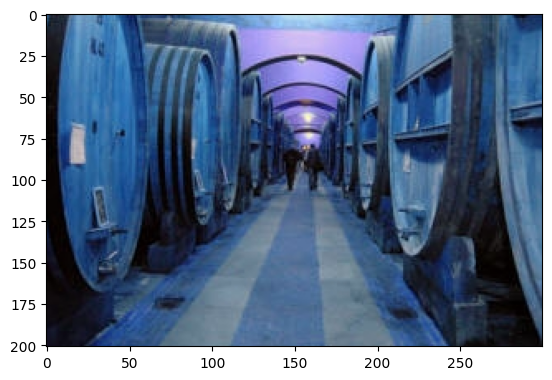

In [ ]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('Images/winecellar/wine_cellar_21_02_altavista.jpg')
plt.imshow(img)

### Loading datasets

1. ImageFolder
2. https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html
3. Torchvision Transforms
4. https://pytorch.org/vision/0.15/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

In [ ]:
import torch
from torchvision import transforms, datasets

# Define the data transformation pipeline
train_transform = transforms.Compose([
    #transforms.RandomRotation(30),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),

    #ToTensor --> joga a informação da imagem dentro de um tensor
    transforms.ToTensor(),
    #normalmente esses dados de normalização vem dos datasets que carregamos para
    #dentro do modelo
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

data_transform = transforms.Compose([
    transforms.Resize((288, 288)),     # Resize the image to (224, 224)
    transforms.ToTensor(),             # Convert image to tensor
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        ),
    ])

# Specify the root directory of your dataset
data_dir = '/content/Images'

# Create an instance of the ImageFolder dataset
#imagefolder identifica cada pasta como sendo uma classe
train_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(root=data_dir, transform=data_transform)

dataset_size = len(train_dataset)
indices = list(range(dataset_size))

In [ ]:
#Algumas outras possibilidades de transformações

"""
train_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
    transforms.RandomGrayscale(p=0.2),
    transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
"""

'\ntrain_transform = transforms.Compose([\n    transforms.RandomRotation(30),\n    transforms.CenterCrop(224),\n    transforms.RandomHorizontalFlip(),\n    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),\n    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),\n    transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),\n    transforms.RandomGrayscale(p=0.2),\n    transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 2.0)),\n    transforms.ToTensor(),\n    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])\n])\n'

Albumentations is a computer vision tool that boosts the performance of deep convolutional neural networks.

https://demo.albumentations.ai/

In [ ]:
indices[-1]

15619

In [ ]:
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
#a partir do data_set, estou jogando ele para os índices
#class to index, referencia cada uma das classes a um inteiro do índice
test_dataset.class_to_idx

{'airport_inside': 0,
 'artstudio': 1,
 'auditorium': 2,
 'bakery': 3,
 'bar': 4,
 'bathroom': 5,
 'bedroom': 6,
 'bookstore': 7,
 'bowling': 8,
 'buffet': 9,
 'casino': 10,
 'children_room': 11,
 'church_inside': 12,
 'classroom': 13,
 'cloister': 14,
 'closet': 15,
 'clothingstore': 16,
 'computerroom': 17,
 'concert_hall': 18,
 'corridor': 19,
 'deli': 20,
 'dentaloffice': 21,
 'dining_room': 22,
 'elevator': 23,
 'fastfood_restaurant': 24,
 'florist': 25,
 'gameroom': 26,
 'garage': 27,
 'greenhouse': 28,
 'grocerystore': 29,
 'gym': 30,
 'hairsalon': 31,
 'hospitalroom': 32,
 'inside_bus': 33,
 'inside_subway': 34,
 'jewelleryshop': 35,
 'kindergarden': 36,
 'kitchen': 37,
 'laboratorywet': 38,
 'laundromat': 39,
 'library': 40,
 'livingroom': 41,
 'lobby': 42,
 'locker_room': 43,
 'mall': 44,
 'meeting_room': 45,
 'movietheater': 46,
 'museum': 47,
 'nursery': 48,
 'office': 49,
 'operating_room': 50,
 'pantry': 51,
 'poolinside': 52,
 'prisoncell': 53,
 'restaurant': 54,
 'resta

In [ ]:
print(test_dataset)

Dataset ImageFolder
    Number of datapoints: 15620
    Root location: /content/Images
    StandardTransform
Transform: Compose(
               Resize(size=(288, 288), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [ ]:
print(test_dataset.class_to_idx)
dicionario_indices = test_dataset.class_to_idx

{'airport_inside': 0, 'artstudio': 1, 'auditorium': 2, 'bakery': 3, 'bar': 4, 'bathroom': 5, 'bedroom': 6, 'bookstore': 7, 'bowling': 8, 'buffet': 9, 'casino': 10, 'children_room': 11, 'church_inside': 12, 'classroom': 13, 'cloister': 14, 'closet': 15, 'clothingstore': 16, 'computerroom': 17, 'concert_hall': 18, 'corridor': 19, 'deli': 20, 'dentaloffice': 21, 'dining_room': 22, 'elevator': 23, 'fastfood_restaurant': 24, 'florist': 25, 'gameroom': 26, 'garage': 27, 'greenhouse': 28, 'grocerystore': 29, 'gym': 30, 'hairsalon': 31, 'hospitalroom': 32, 'inside_bus': 33, 'inside_subway': 34, 'jewelleryshop': 35, 'kindergarden': 36, 'kitchen': 37, 'laboratorywet': 38, 'laundromat': 39, 'library': 40, 'livingroom': 41, 'lobby': 42, 'locker_room': 43, 'mall': 44, 'meeting_room': 45, 'movietheater': 46, 'museum': 47, 'nursery': 48, 'office': 49, 'operating_room': 50, 'pantry': 51, 'poolinside': 52, 'prisoncell': 53, 'restaurant': 54, 'restaurant_kitchen': 55, 'shoeshop': 56, 'stairscase': 57, '

### Dataset splits

1. Using train_test_split from sklearn
2. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
3. Using SubsetRandomSampler from torch
4. https://pytorch.org/docs/stable/data.html#torch.utils.data.SubsetRandomSampler

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(indices, test_size=0.25)
print(len(train_idx), len(test_idx))

# Create a DataLoader to load data in batches
batch_size = 64

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

print(train_sampler)
print(test_sampler)

11715 3905


Abaixo serão criados os os carregamentos dos dados de teste e treinamento e em seguida duas listas de listas, cada uma delas contendo as classes que foram identificadas nos splits de treinamento e teste para cada uma das diferentes batches de 64 unidades.

In [ ]:
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    #shuffle=True,
    sampler=train_sampler
    )

test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    #shuffle=True,
    sampler=test_sampler
    )

# Iterate through the DataLoader
qnt_train = 0
list_classes_train = []

for inputs, labels in train_dataloader:
    # print(inputs.shape, labels)
    # print(labels.min(), labels.max())
    # print('\n')
    lista_tensor = []
    lista_tensor = labels.tolist()
    list_classes_train.append(lista_tensor)
    qnt_train = qnt_train + 1

qnt_test = 0
list_classes_test = []

for inputs, labels in test_dataloader:
    # print(inputs.shape, labels)
    # print(labels.min(), labels.max())
    # print('\n')
    lista_tensor = []
    lista_tensor = labels.tolist()
    list_classes_test.append(lista_tensor)
    qnt_test = qnt_test + 1

print(f'Quantidade de batch de tamanho {batch_size} no Train: {qnt_train}')
print(list_classes_train)
print(f'Quantidade de batch de tamanho {batch_size} no Test: {qnt_test}')
print(list_classes_test)

Quantidade de batch de tamanho 64 no Train: 184
[[8, 65, 0, 37, 16, 54, 43, 36, 32, 3, 10, 51, 22, 4, 32, 33, 47, 7, 30, 22, 43, 37, 37, 4, 59, 42, 9, 16, 41, 48, 27, 25, 26, 47, 4, 6, 34, 61, 44, 50, 59, 54, 0, 65, 51, 44, 44, 8, 43, 39, 17, 0, 45, 6, 19, 10, 12, 4, 11, 42, 30, 4, 59, 10], [59, 54, 54, 63, 41, 42, 13, 8, 6, 10, 59, 6, 3, 10, 61, 41, 43, 37, 4, 51, 28, 20, 41, 53, 51, 0, 24, 61, 20, 31, 19, 51, 19, 27, 29, 7, 62, 50, 22, 8, 63, 20, 1, 8, 30, 63, 9, 21, 9, 64, 60, 4, 51, 10, 54, 45, 4, 54, 17, 51, 2, 3, 10, 15], [23, 21, 38, 2, 0, 37, 58, 6, 0, 12, 34, 37, 41, 20, 6, 63, 5, 6, 32, 4, 50, 41, 27, 45, 37, 20, 29, 6, 6, 0, 61, 30, 10, 24, 7, 3, 41, 64, 52, 28, 22, 31, 14, 6, 42, 54, 60, 59, 53, 61, 37, 34, 44, 22, 20, 61, 59, 26, 8, 32, 7, 32, 22, 57], [22, 0, 41, 54, 19, 22, 10, 26, 47, 56, 59, 20, 0, 43, 57, 10, 19, 54, 17, 6, 0, 62, 59, 64, 51, 63, 46, 55, 50, 45, 44, 13, 10, 45, 59, 59, 39, 50, 59, 3, 54, 3, 59, 51, 28, 45, 34, 6, 63, 17, 66, 62, 0, 20, 6, 17, 6, 6, 57

O próximo passo é a conversão de lista de listas em uma única lista, contendo a classe de todos os elementos existentes tanto na etapa de treinamento como teste:

In [ ]:
lista_completa_train = []
for lista in list_classes_train:
  for elemento in lista:
    lista_completa_train.append(elemento)

lista_ordenada_train = sorted(lista_completa_train)
print('Lista Train:')
print(lista_ordenada_train)
print(f'len Train: {len(lista_ordenada_train)}')

Lista Train:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
lista_completa_test = []
for lista in list_classes_test:
  for elemento in lista:
    lista_completa_test.append(elemento)

lista_ordenada_test = sorted(lista_completa_test)
print('Lista test:')
print(lista_ordenada_test)
print(f'len test: {len(lista_ordenada_test)}')

Lista test:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [ ]:
lista_indices = []
for indices in dicionario_indices.values():
  lista_indices.append(indices)
print(f'Tamanho da lista de classes: {len(lista_indices)}:\n{lista_indices}')


Tamanho da lista de classes: 67:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


Nesta etapa são criadas duas listas, uma para teste e outra para treinamento, porém, ambas contendo os mesmos elementos:
- Elas serão listas de listas de comprimento 67
- O índice 0 de cada elemento da lista será referente à classe
- o índice 1 de cada elemento da lista referente à quantidade de vezes que aquele elemento foi identificado

In [ ]:
qnt_por_classe_train = []
qnt_por_classe_test = []

for indice in lista_indices:
  qnt_elementos_iguais = 0
  for classe in lista_ordenada_train:
    if classe == indice:
      qnt_elementos_iguais += 1
  qnt_por_classe_train.append([indice,qnt_elementos_iguais])

verif_elementos_train = 0
for indice, qnt in qnt_por_classe_train:
  verif_elementos_train += qnt

for indice in lista_indices:
  qnt_elementos_iguais = 0
  for classe in lista_ordenada_test:
    if classe == indice:
      qnt_elementos_iguais += 1
  qnt_por_classe_test.append([indice,qnt_elementos_iguais])

verif_elementos_test = 0
for indice, qnt in qnt_por_classe_test:
  verif_elementos_test += qnt


In [ ]:
print(f'Lista de classe do conjunto de treinamento: qnt de imagens = {verif_elementos_train}; qnt de classes = {len(qnt_por_classe_train)}')
print(qnt_por_classe_train)
print()
print(f'Lista de classe do conjunto de teste: qnt de imagens = {verif_elementos_test}; qnt de classes = {len(qnt_por_classe_test)}')
print(qnt_por_classe_test)



Lista de classe do conjunto de treinamento: qnt de imagens = 11715; qnt de classes = 67
[[0, 448], [1, 109], [2, 142], [3, 311], [4, 456], [5, 150], [6, 501], [7, 280], [8, 161], [9, 80], [10, 400], [11, 84], [12, 131], [13, 84], [14, 95], [15, 99], [16, 74], [17, 87], [18, 73], [19, 279], [20, 201], [21, 98], [22, 201], [23, 78], [24, 88], [25, 78], [26, 95], [27, 81], [28, 80], [29, 151], [30, 169], [31, 172], [32, 72], [33, 72], [34, 331], [35, 117], [36, 100], [37, 538], [38, 92], [39, 211], [40, 76], [41, 521], [42, 65], [43, 184], [44, 130], [45, 191], [46, 129], [47, 130], [48, 116], [49, 72], [50, 102], [51, 280], [52, 144], [53, 73], [54, 395], [55, 83], [56, 88], [57, 111], [58, 87], [59, 395], [60, 268], [61, 111], [62, 122], [63, 78], [64, 110], [65, 374], [66, 211]]

Lista de classe do conjunto de teste: qnt de imagens = 3905; qnt de classes = 67
[[0, 160], [1, 31], [2, 34], [3, 94], [4, 148], [5, 47], [6, 161], [7, 100], [8, 52], [9, 31], [10, 115], [11, 28], [12, 49], [1

#### Plotagem da quantidade de elementos por classe depois do SPLIT

Para isso, é feita uma separção dos elementos que representam a quantidade de vezes que a classe aparece e, por fim, é feita uma plotagem da quantidade que cada classe aparece nas etapas de treinamento e teste.

In [ ]:
qnt_por_classe_train_y = []
qnt_por_classe_test_y = []

for classe, qnt in qnt_por_classe_train:
  qnt_por_classe_train_y.append(qnt)

for classe, qnt in qnt_por_classe_test:
  qnt_por_classe_test_y.append(qnt)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    x=lista_indices,
    y=qnt_por_classe_train_y,
    name='Qnt de imagens por classe - Treinamento',
    marker_color='darkred'
))
fig.add_trace(go.Bar(
    x=lista_indices,
    y=qnt_por_classe_test_y,
    name='Qnt de imagens por classe - Teste',
    marker_color='darkblue'
))

fig.update_layout(
    height=700,
    width=1800,
    #barmode='group',
    xaxis_tickangle=-90
)
fig.show()

# Timm

1. Escolheu-se utilizar a biblioteca Timm devido ao fato dela conter diversos modelos pré-treinados
3. https://huggingface.co/docs/timm/index
4. Good review: https://towardsdatascience.com/getting-started-with-pytorch-image-models-timm-a-practitioners-guide-4e77b4bf9055


In [ ]:
import torch

torch.__version__

'2.5.1+cu124'

In [ ]:
!pip install timm

In [ ]:
import timm

In [ ]:
timm.list_models(pretrained=True), len(timm.list_models(pretrained=True))

(['aimv2_1b_patch14_224.apple_pt',
  'aimv2_1b_patch14_336.apple_pt',
  'aimv2_1b_patch14_448.apple_pt',
  'aimv2_3b_patch14_224.apple_pt',
  'aimv2_3b_patch14_336.apple_pt',
  'aimv2_3b_patch14_448.apple_pt',
  'aimv2_huge_patch14_224.apple_pt',
  'aimv2_huge_patch14_336.apple_pt',
  'aimv2_huge_patch14_448.apple_pt',
  'aimv2_large_patch14_224.apple_pt',
  'aimv2_large_patch14_224.apple_pt_dist',
  'aimv2_large_patch14_336.apple_pt',
  'aimv2_large_patch14_336.apple_pt_dist',
  'aimv2_large_patch14_448.apple_pt',
  'bat_resnext26ts.ch_in1k',
  'beit_base_patch16_224.in22k_ft_in22k',
  'beit_base_patch16_224.in22k_ft_in22k_in1k',
  'beit_base_patch16_384.in22k_ft_in22k_in1k',
  'beit_large_patch16_224.in22k_ft_in22k',
  'beit_large_patch16_224.in22k_ft_in22k_in1k',
  'beit_large_patch16_384.in22k_ft_in22k_in1k',
  'beit_large_patch16_512.in22k_ft_in22k_in1k',
  'beitv2_base_patch16_224.in1k_ft_in1k',
  'beitv2_base_patch16_224.in1k_ft_in22k',
  'beitv2_base_patch16_224.in1k_ft_in22k_i

# Training pipeline

De posse dos modelos existentes no Timm, escolheu-se utilizar para o projeto o modelo "resnet18d" devido ao fato do modelo ResNet ser bom para classificação de imagens, ganhando o prêmio de melhor arquitetura na época.
- A arquitetura escolhida foi a ResNet18 ao invés da 50 ou da 100 devido ao fato das demais conterem um grande número de parâmetros e exigirem uma GPU potente e não ser possível rodar somente com o acesso disponibilizado pela google de forma gratuita.   

In [ ]:
model = timm.create_model('resnet18d', pretrained=True, num_classes=67)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



model.safetensors:   0%|          | 0.00/46.9M [00:00<?, ?B/s]

In [ ]:
model

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
   

In [ ]:
x = torch.randn(1, 3, 224, 224)
model(x).shape

torch.Size([1, 67])

In [ ]:
model.forward_features(x).shape

torch.Size([1, 512, 7, 7])

In [ ]:
model.pretrained_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet18d_ra2-48a79e06.pth',
 'hf_hub_id': 'timm/resnet18d.ra2_in1k',
 'architecture': 'resnet18d',
 'tag': 'ra2_in1k',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'test_input_size': (3, 288, 288),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.875,
 'test_crop_pct': 0.95,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv1.0',
 'classifier': 'fc',
 'origin_url': 'https://github.com/huggingface/pytorch-image-models'}

# Training pipeline

## Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from tqdm.notebook import tqdm

def evaluate(dataloader, model):
  model.cuda()
  model.eval()

  targets = []
  all_preds = []

  for x, y in tqdm(dataloader):
    logits = model(x.cuda())
    pred = logits.argmax(1).flatten().cpu().tolist()

    targets.extend(y.cpu().tolist())
    all_preds.extend(pred)

  acc = accuracy_score(y_true=targets, y_pred=all_preds)
  cm = confusion_matrix(y_true=targets, y_pred=all_preds)
  f1 = f1_score(y_true=targets, y_pred=all_preds, average='weighted')

  return acc, cm, f1

evaluate(test_dataloader, model)

  0%|          | 0/62 [00:00<?, ?it/s]

(0.015620998719590268,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 0.004955038844660152)

## Epoch

In [ ]:
def epoch(dataloader, model, criterion, optimizer):
  model.cuda()
  model.train()

  epoch_loss = 0.0
  num_batches = 0

  for x, y in tqdm(dataloader):
    # erase the current model gradients
    optimizer.zero_grad()

    # forward
    logits = model(x.cuda())
    loss = criterion(input=logits, target=y.cuda())

    # backward
    loss.backward()

    # weights update ~ w = w_cur - lr*grad(loss, w)
    optimizer.step()

    epoch_loss += loss.detach().cpu().item()
    num_batches += 1

  return epoch_loss/num_batches

## Pipeline



1.   Define criterion (https://pytorch.org/docs/stable/nn.html#loss-functions)
2.   Define optimizer (https://pytorch.org/docs/stable/optim.html)
3.   Define hyperparameters (i.e. num epochs, learning rate, ...)
4.   Training loop



In [ ]:
summary = {
    'model_state':None,
    'f1_history':[],
    'acc_history':[],
    'cm_history':[],
    'train_loss_history':[]
}

lr = 1e-3
num_epochs = 10
best_acc = 0.0

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss(weight=None)


for e in range(num_epochs):
  print('Epoch:', e)
  cur_loss = epoch(train_dataloader, model, criterion, optimizer)
  test_acc, test_cm, test_f1 = evaluate(test_dataloader, model)

  summary['f1_history'].append(test_f1)
  summary['acc_history'].append(test_acc)
  summary['cm_history'].append(test_cm)
  summary['train_loss_history'].append(cur_loss)

  if test_acc > best_acc:
    summary['model_state'] = model.state_dict()
    best_acc = test_acc

  print('\t Training loss:', cur_loss)
  print('\t Test accuracy:', test_acc)
  print('\t Test confusion-matrix:', test_cm)
  print('\t Test F1:', test_f1)
  print()

summary_path = 'summary.pth'

torch.save(summary, summary_path)

Epoch: 0


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

	 Training loss: 2.1700598817804586
	 Test accuracy: 0.5664532650448143
	 Test confusion-matrix: [[68  0  0 ...  0  6  1]
 [ 0  7  0 ...  1  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 1  0  0 ...  0 95  1]
 [ 0  0  0 ...  0  1 45]]
	 Test F1: 0.5502408558794396

Epoch: 1


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

	 Training loss: 1.2429049578697786
	 Test accuracy: 0.6071702944942382
	 Test confusion-matrix: [[ 79   0   0 ...   0   3   2]
 [  1   7   0 ...   0   2   0]
 [  0   0   5 ...   0   0   3]
 ...
 [  0   0   0 ...  18   0   0]
 [  0   0   0 ...   0 115   2]
 [  0   0   0 ...   0   0  46]]
	 Test F1: 0.5952021833354691

Epoch: 2


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

	 Training loss: 0.8358648717403412
	 Test accuracy: 0.62202304737516
	 Test confusion-matrix: [[ 87   0   0 ...   0   5   0]
 [  1   2   0 ...   1   2   0]
 [  1   0  23 ...   1   0   0]
 ...
 [  1   0   1 ...  28   1   0]
 [  0   0   0 ...   0 113   0]
 [  0   0   0 ...   0   4  43]]
	 Test F1: 0.6133439152570547

Epoch: 3


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

	 Training loss: 0.5750504575021889
	 Test accuracy: 0.646606914212548
	 Test confusion-matrix: [[ 53   1   0 ...   0   3   0]
 [  0  16   0 ...   0   0   0]
 [  0   0  13 ...   0   0   0]
 ...
 [  0   0   0 ...  24   0   0]
 [  0   0   2 ...   0 111   0]
 [  0   0   0 ...   0   0  46]]
	 Test F1: 0.6397538764449072

Epoch: 4


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

	 Training loss: 0.414305006356343
	 Test accuracy: 0.6688860435339309
	 Test confusion-matrix: [[101   1   0 ...   0   8   0]
 [  0  14   0 ...   0   1   0]
 [  1   0  14 ...   0   0   0]
 ...
 [  0   0   0 ...  10   1   0]
 [  0   0   0 ...   0 118   1]
 [  0   0   0 ...   0   0  43]]
	 Test F1: 0.6632917997222793

Epoch: 5


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

	 Training loss: 0.3861018289690432
	 Test accuracy: 0.6742637644046094
	 Test confusion-matrix: [[ 90   0   0 ...   0   0   0]
 [  1   9   0 ...   0   2   0]
 [  1   0  13 ...   0   0   1]
 ...
 [  0   0   0 ...  29   0   0]
 [  0   0   0 ...   0 113   2]
 [  0   0   0 ...   0   0  49]]
	 Test F1: 0.6664107251908923

Epoch: 6


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

	 Training loss: 0.27359825368646695
	 Test accuracy: 0.6645326504481434
	 Test confusion-matrix: [[ 92   0   0 ...   0   6   0]
 [  1  12   0 ...   0   3   0]
 [  0   0  19 ...   0   0   0]
 ...
 [  1   0   2 ...  24   1   0]
 [  1   0   0 ...   0 121   2]
 [  0   0   0 ...   0   1  52]]
	 Test F1: 0.6622027730997244

Epoch: 7


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

	 Training loss: 0.18746268883873912
	 Test accuracy: 0.6632522407170295
	 Test confusion-matrix: [[109   0   0 ...   0   3   0]
 [  1  12   0 ...   0   0   0]
 [  1   0  17 ...   0   0   0]
 ...
 [  0   0   1 ...  20   1   0]
 [  4   0   0 ...   0 109   3]
 [  0   0   0 ...   0   0  48]]
	 Test F1: 0.660978038036083

Epoch: 8


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

	 Training loss: 0.17447330454445403
	 Test accuracy: 0.6174135723431498
	 Test confusion-matrix: [[106   0   0 ...   0   3   0]
 [  1  10   0 ...   0   2   0]
 [  1   0  18 ...   1   0   0]
 ...
 [  0   0   0 ...  28   0   0]
 [  1   0   0 ...   0 104   0]
 [  0   0   0 ...   0   3  37]]
	 Test F1: 0.6177170307235044

Epoch: 9


  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

	 Training loss: 0.18561349141047054
	 Test accuracy: 0.6804097311139564
	 Test confusion-matrix: [[ 88   2   0 ...   0   3   0]
 [  0  22   0 ...   0   0   0]
 [  1   0  22 ...   0   0   0]
 ...
 [  1   0   2 ...  27   0   0]
 [  0   0   0 ...   0 120   1]
 [  0   0   1 ...   0   0  45]]
	 Test F1: 0.6758047822367982



In [ ]:
summary_path = 'summary.pth'

torch.save(summary, summary_path)

# Loading summary

1. Loading and saving torch checkpoint
2. https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html

In [ ]:
ckp = torch.load('summary.pth')

<ipython-input-36-52e9c326b1ef>:1: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



### Summary keys and values

In [ ]:
ckp

{'model_state': OrderedDict([('conv1.0.weight',
               tensor([[[[ 5.5780e-02,  4.0831e-02, -8.8045e-01],
                         [ 9.6840e-02,  8.5143e-01,  5.0651e-01],
                         [-6.2513e-01,  4.0365e-01, -3.8111e-01]],
               
                        [[-1.1958e-02,  1.2712e-01,  5.1335e-01],
                         [-2.0301e-02, -9.1992e-01, -4.3637e-01],
                         [ 4.2352e-01, -7.8149e-02,  3.8477e-01]],
               
                        [[ 1.1290e-01,  3.5959e-02, -1.7111e-01],
                         [ 7.6855e-02,  3.8442e-01,  8.2773e-02],
                         [-9.0151e-02,  6.1844e-02, -2.7151e-01]]],
               
               
                       [[[ 1.0324e-01,  1.2275e-01,  9.1101e-02],
                         [ 3.7946e-03, -6.7120e-02, -2.6240e-01],
                         [ 2.6928e-01, -1.8317e-01, -6.7197e-02]],
               
                        [[-2.5558e-01, -4.1562e-01, -2.2688e-01],
         

## Resultado

Carregando os melhores resultados obtidos:
- Para isso, vamos utilizar como base a melhor acurária (best_acc)

In [ ]:
for indice in range(len(ckp['acc_history'])):
  if ckp['acc_history'][indice] == best_acc:
      print('\t Training loss:', ckp['train_loss_history'][indice])
      print('\t Test accuracy:', ckp['acc_history'][indice])
      print('\t Test F1:', ckp['f1_history'][indice])
      cm_matrix = ckp['cm_history'][indice]
      print('\t Test confusion-matrix:', ckp['cm_history'][indice])

	 Training loss: 0.18561349141047054
	 Test accuracy: 0.6804097311139564
	 Test F1: 0.6758047822367982
	 Test confusion-matrix: [[ 88   2   0 ...   0   3   0]
 [  0  22   0 ...   0   0   0]
 [  1   0  22 ...   0   0   0]
 ...
 [  1   0   2 ...  27   0   0]
 [  0   0   0 ...   0 120   1]
 [  0   0   1 ...   0   0  45]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

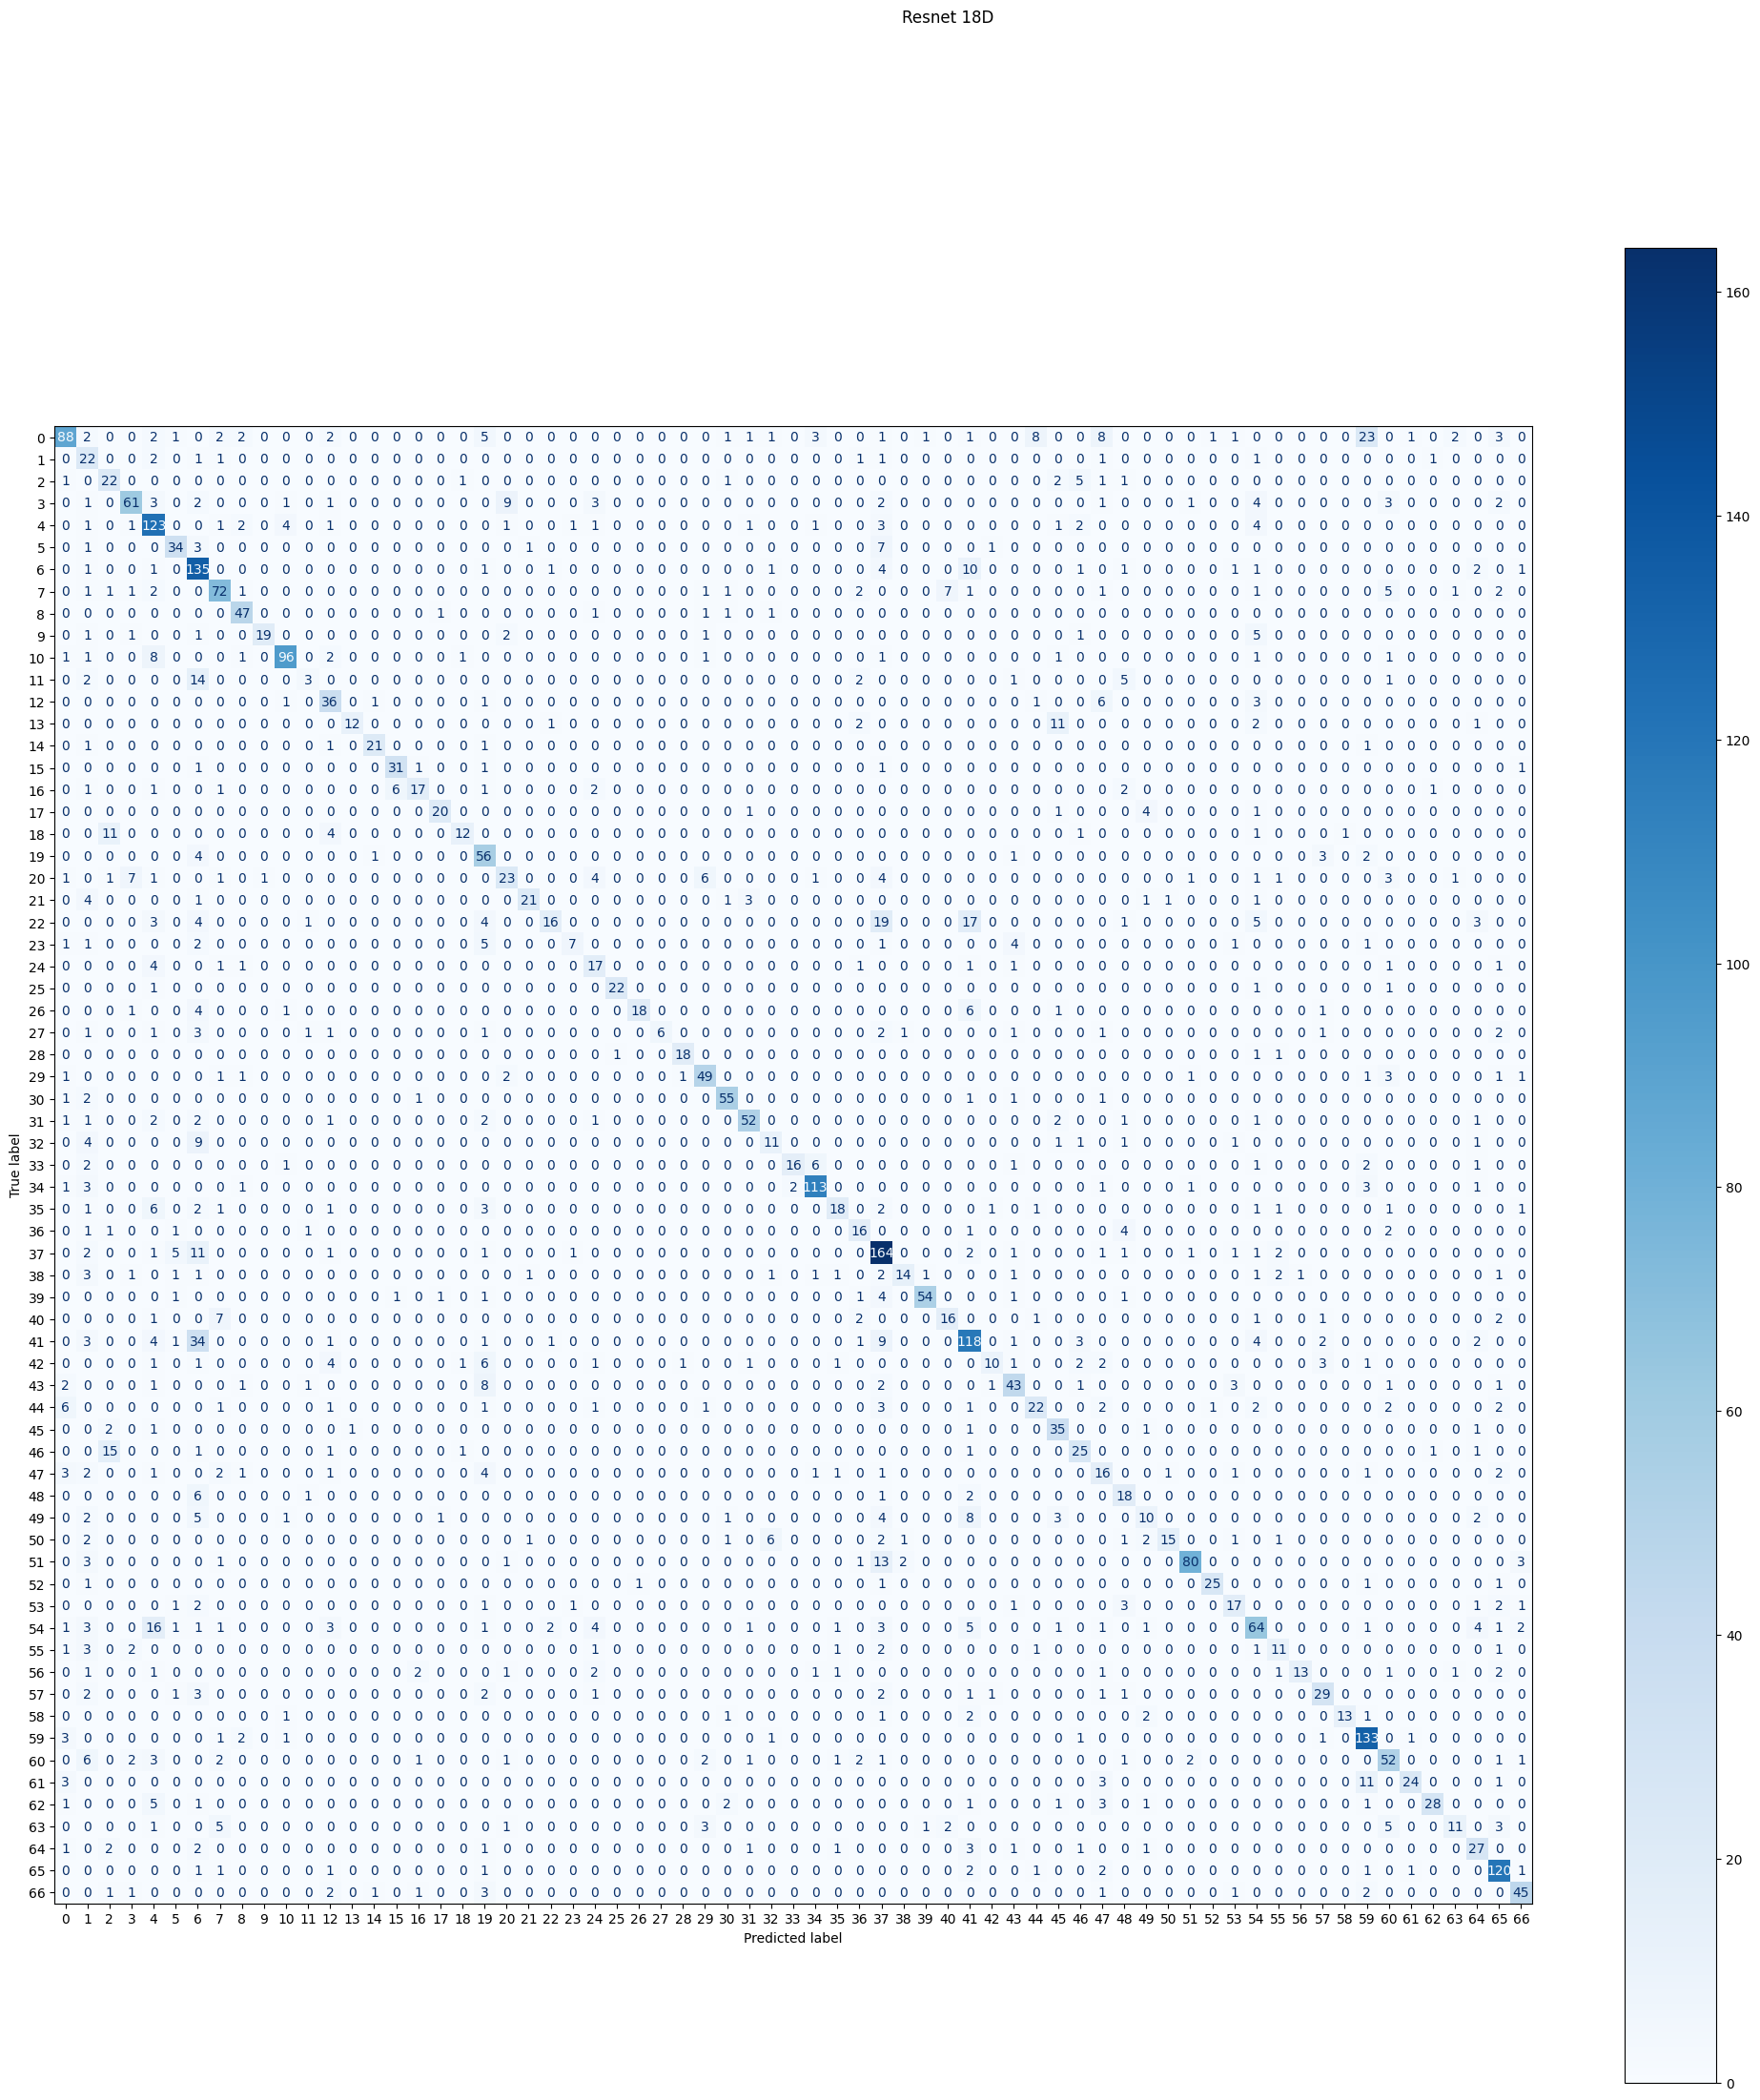

In [ ]:
fig, ax = plt.subplots(figsize=(25,25))
plt.suptitle("Resnet 18D")
ax.grid(False)

# Exibindo a matriz de confusão diretamente
cmd = ConfusionMatrixDisplay(cm_matrix)

cmd.plot(cmap="Blues", ax=ax)  # Define um colormap para melhor visualização

plt.show()

###Conclusão

Observa-se que o modelo testado apresentou uma acurácia maior que 67%. O que apresenta um resultado significativo.
- Em caso de posse de uma GPU melhor e mais potente, seria possível testar diferentes modelos que poderiam apresentar uma acurácia ainda maior que a encontrada neste teste.

In [ ]:
# import IPython
# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)